In [30]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [31]:
dataset = pd.read_csv(r'C:\Users\kesav\OneDrive - SSN Trust\DS\EXAMPLES\sample\KMEANS\household_power_consumption.txt',delimiter=';')
dataset

C:\Users\kesav\AppData\Local\Temp\ipykernel_7196\1880828671.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'C:\Users\kesav\OneDrive - SSN Trust\DS\EXAMPLES\sample\KMEANS\household_power_consumption.txt',delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [32]:
dataset['MinofDay'] = dataset["Time"].apply(lambda time: int(time.split(":")[0])*60 + int(time.split(":")[1]))
dataset



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,MinofDay
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,1044
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,1045
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,1046
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,1047
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,1048
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,1258
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,1259
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,1260
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,1261


In [33]:
columns = dataset['Date'].str.split("/",expand=True)
dataset[['Day','Month','Year']] = columns
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,MinofDay,Day,Month,Year
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,1044,16,12,2006
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,1045,16,12,2006
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,1046,16,12,2006
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,1047,16,12,2006
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,1048,16,12,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,1258,26,11,2010
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,1259,26,11,2010
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,1260,26,11,2010
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,1261,26,11,2010


In [34]:
dataset = dataset.drop(['Date','Time'],axis = 1)
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,MinofDay,Day,Month,Year
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,1044,16,12,2006
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,1045,16,12,2006
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,1046,16,12,2006
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,1047,16,12,2006
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,1048,16,12,2006
...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0,1258,26,11,2010
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0,1259,26,11,2010
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0,1260,26,11,2010
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0,1261,26,11,2010


In [35]:
dataset = dataset.dropna()


In [36]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(dataset,dataset['Voltage'],test_size=0.2)

In [37]:
X_Train = np.array(X_Train).astype(str)


In [38]:
Inertias = []
Models = []

for i in range(2,20):
    classifier = KMeans(n_clusters=i,random_state=42)
    classifier.fit(X_Train)
    file = open("Models/{}-clusters.pkl".format(i),'wb')
    pickle.dump(classifier,file)
    file.close()
    print("{} - Clusters   |   Inertia - {}".format(i,classifier.inertia_))
    Inertias.append(classifier.inertia_)
    Models.append(i)

c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 - Clusters   |   Inertia - 71276932445.17377


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 - Clusters   |   Inertia - 31884137095.195724


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 - Clusters   |   Inertia - 18118096046.35645


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 - Clusters   |   Inertia - 11754564084.839294


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 - Clusters   |   Inertia - 8282501539.069144


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 - Clusters   |   Inertia - 6190317909.500465


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 - Clusters   |   Inertia - 4837638309.034633


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 - Clusters   |   Inertia - 3909628492.1252136


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 - Clusters   |   Inertia - 3242126058.209142


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


11 - Clusters   |   Inertia - 2749913273.277592


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12 - Clusters   |   Inertia - 2376414672.687139


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


13 - Clusters   |   Inertia - 2083720187.4869087


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14 - Clusters   |   Inertia - 1851024020.903175


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15 - Clusters   |   Inertia - 1666286055.6781924


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


16 - Clusters   |   Inertia - 1514768139.3498704


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


17 - Clusters   |   Inertia - 1389515322.9169254


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


18 - Clusters   |   Inertia - 1280392982.1154816


c:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


19 - Clusters   |   Inertia - 1193670494.34006


Text(0, 0.5, 'Inertias')

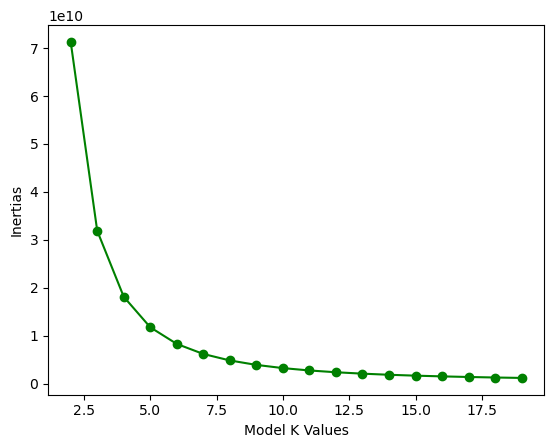

In [39]:
plt.plot(Models,Inertias,'-og')
plt.xlabel('Model K Values')
plt.ylabel('Inertias')

In [40]:
BestKValue = 4
BestFile = open("Models/{}-clusters.pkl".format(BestKValue),'rb')
model = pickle.load(BestFile)
BestFile.close()
BestFile = open("BestClassifier.pkl",'wb')
pickle.dump(model,BestFile)
BestFile.close()

In [41]:
EnergyClassifications = model.labels_
EnergyClassifications

array([3, 2, 3, ..., 2, 1, 3])

In [16]:
EnergyTransformed = model.transform(X_Train)
EnergyTransformed.shape

NameError: name 'model' is not defined

In [17]:
EnergyClasses = pd.DataFrame(EnergyTransformed,columns=['E_1','E_2','E_3','E_4'])

NameError: name 'EnergyTransformed' is not defined

In [18]:
plt.scatter(x=EnergyClasses['E_1'],y=EnergyClasses['E_2'])
plt.show()
plt.scatter(x=EnergyClasses['E_1'],y=EnergyClasses['E_3'])
plt.show()
plt.scatter(x=EnergyClasses['E_1'],y=EnergyClasses['E_4'])
plt.show()
plt.scatter(x=EnergyClasses['E_2'],y=EnergyClasses['E_3'])
plt.show()

NameError: name 'EnergyClasses' is not defined